# Lab 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Create a corpus

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#%cd /content/gdrive/MyDrive/ls-190colab/cap-examples
%cd /content/gdrive/MyDrive/LS190

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/LS190


In [ ]:
import os
import sys
sys.path.append('..')

import lzma
import json

from config import settings_base as settings
import utils

# Get Case Data for California
compressed_file = utils.get_and_extract_from_bulk(jurisdiction="California", data_format="json")

In [ ]:
# Assume we are dealing with json data (if data_format is changed to xml or
# change this cell's os.path.join line)
if not compressed_file.endswith('.xz'):
  compressed_file = os.path.join(compressed_file, "data", "data.jsonl.xz") 

In [ ]:
cases = []
print("File path:", compressed_file)
with lzma.open(compressed_file) as infile:
    for line in infile:
        record = json.loads(str(line, 'utf-8'))
        cases.append(record)

print("Case count: %s" % len(cases))

File path: /content/gdrive/MyDrive/LS190/config/../data/California-20200302-text/data/data.jsonl.xz
Case count: 141535


In [ ]:
df = pd.DataFrame(cases)
df.head()

,id,url,name,name_abbreviation,decision_date,docket_number,first_page,last_page,citations,volume,reporter,court,jurisdiction,frontend_url,preview,casebody
0,505141,https://api.capapi.org/v1/cases/505141/,"JIMMY DEAN ZIEGLER, as Trustee, etc., et al., ...",Ziegler v. Nickel,1998-06-04,No. B100335,545,549,"[{'type': 'official', 'cite': '64 Cal. App. 4t...",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/3...,{'url': 'https://api.capapi.org/v1/courts/cal-...,"{'name': 'Cal.', 'name_long': 'California', 'w...",https://cite.capapi.org/cal-app-4th/64/545/,[],"{'data': {'judges': [], 'attorneys': ['Counsel..."
1,505122,https://api.capapi.org/v1/cases/505122/,"THE PEOPLE, Plaintiff and Respondent, v. ALAN ...",People v. Shaw,1998-06-02,No. F026821,492,501,"[{'type': 'official', 'cite': '64 Cal. App. 4t...",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/3...,{'url': 'https://api.capapi.org/v1/courts/cal-...,"{'name': 'Cal.', 'name_long': 'California', 'w...",https://cite.capapi.org/cal-app-4th/64/492/,[],"{'data': {'judges': [], 'attorneys': ['Counsel..."
2,505083,https://api.capapi.org/v1/cases/505083/,"THE PEOPLE, Plaintiff and Respondent, v. DAVID...",People v. Lopez,1998-06-15,No. B115397,1122,1129,"[{'type': 'official', 'cite': '64 Cal. App. 4t...",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/3...,{'url': 'https://api.capapi.org/v1/courts/cal-...,"{'name': 'Cal.', 'name_long': 'California', 'w...",https://cite.capapi.org/cal-app-4th/64/1122/,[],"{'data': {'judges': [], 'attorneys': ['Counsel..."
3,505120,https://api.capapi.org/v1/cases/505120/,"20TH CENTURY INSURANCE COMPANY et al., Plainti...",20th Century Insurance v. Quackenbush,1998-05-22,No. A079667,135,142,"[{'type': 'official', 'cite': '64 Cal. App. 4t...",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/3...,{'url': 'https://api.capapi.org/v1/courts/cal-...,"{'name': 'Cal.', 'name_long': 'California', 'w...",https://cite.capapi.org/cal-app-4th/64/135/,[],"{'data': {'judges': [], 'attorneys': ['Counsel..."
4,505113,https://api.capapi.org/v1/cases/505113/,"SAN DIEGO GAS & ELECTRIC CO., Plaintiff and Re...",San Diego Gas & Electric Co. v. City of Carlsbad,1998-06-09,No. D027407,785,806,"[{'type': 'official', 'cite': '64 Cal. App. 4t...",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/3...,{'url': 'https://api.capapi.org/v1/courts/cal-...,"{'name': 'Cal.', 'name_long': 'California', 'w...",https://cite.capapi.org/cal-app-4th/64/785/,[],"{'data': {'judges': [], 'attorneys': ['Counsel..."


In [ ]:
opinion_data = []
for case in cases:
    for opinion in case["casebody"]["data"]["opinions"]:
        temp = {}
        keys = list(case.keys())
        keys.remove('casebody')
        for key in keys:         
            temp[key] = case[key]
        keys = list(opinion.keys())
        for key in keys:         
            temp[key] = opinion[key]
        opinion_data.append(temp)
        
df = pd.DataFrame(opinion_data)
df["citations"] = df["citations"].apply(lambda x:x[0]['cite'])
df["court"] = df["court"].apply(lambda x:x['name'])
df["decision_date"] = df["decision_date"].apply(lambda x:int(x[:4]))
df = df.drop(["docket_number", "first_page", 
                                "last_page", "name_abbreviation",
                                "reporter", "volume", "jurisdiction"], axis=1)
df = df[["id", "name", "decision_date", "court", "citations", "author", "type", "text"]]

In [ ]:
df.head()

,id,name,decision_date,court,citations,author,type,text
0,505141,"JIMMY DEAN ZIEGLER, as Trustee, etc., et al., ...",1998,Court of Appeal of the State of California,64 Cal. App. 4th 545,"ALDRICH, J.",majority,"Opinion\nALDRICH, J.\nIntroduction\nPlaintiff,..."
1,505122,"THE PEOPLE, Plaintiff and Respondent, v. ALAN ...",1998,Court of Appeal of the State of California,64 Cal. App. 4th 492,"THAXTER, J.",majority,"Opinion\nTHAXTER, J.\nAppellant Alan Michael S..."
2,505083,"THE PEOPLE, Plaintiff and Respondent, v. DAVID...",1998,Court of Appeal of the State of California,64 Cal. App. 4th 1122,"GILBERT, J.",majority,"Opinion\nGILBERT, J.\nDavid Lopez was convicte..."
3,505120,"20TH CENTURY INSURANCE COMPANY et al., Plainti...",1998,Court of Appeal of the State of California,64 Cal. App. 4th 135,"STEIN, Acting P. J.",majority,"Opinion\nSTEIN, Acting P. J.\n20th Century Ins..."
4,505113,"SAN DIEGO GAS & ELECTRIC CO., Plaintiff and Re...",1998,Court of Appeal of the State of California,64 Cal. App. 4th 785,"HUFFMAN, Acting P. J.",majority,"Opinion\nHUFFMAN, Acting P. J.\nIn this declar..."


In [ ]:
# Subset the dataset to a managable amount
df = df[df['decision_date']>=2016]

## Part 2: Clustering

### **K-means Clustering**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.01,
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))

In [ ]:
X = vectorizer.fit_transform(df.text)

In [ ]:
# Convert X to dense matrix, since the below clustering algorithms can only work with dense matrices
X_dense = X.todense()
X_dense

matrix([[0.        , 0.        , 0.        , ..., 0.00863033, 0.        ,
         0.00329772],
        [0.01117482, 0.0035367 , 0.        , ..., 0.        , 0.        ,
         0.01418514],
        [0.        , 0.00937047, 0.02941609, ..., 0.        , 0.01066193,
         0.00939588],
        ...,
        [0.00723723, 0.00916198, 0.0143808 , ..., 0.00601062, 0.        ,
         0.        ],
        [0.        , 0.00793254, 0.        , ..., 0.00693874, 0.01203443,
         0.00265135],
        [0.00723597, 0.00916038, 0.01437829, ..., 0.00600957, 0.        ,
         0.        ]])

In [ ]:
# create 40 clusters of similar documents
from sklearn.cluster import KMeans
num_clusters = 40
km = KMeans(n_clusters=num_clusters)
km.fit(X)
doc_clusters = km.labels_.tolist()

In [ ]:
df['cluster'] = doc_clusters
df[df['cluster']==3]['text']

142474    Opinion\nROBIE, J.\nConvicted of 11 sexual off...
142475    Opinion\nNICHOLSON, J.\nIn this appeal, we det...
142654    Opinion\nBUTZ, J.—\nWhile on patrol in his off...
142656    Opinion\nBLUMENFELD, J. —\nINTRODUCTION\nWhile...
142657    SEGAL, J., Dissenting. —\nIn my view, the majo...
                                ...                        
154319    Opinion\nBENKE, Acting P. P. J.—\nDefendant an...
154325    Opinion\nHOCH, J.\nA jury convicted defendant ...
154326    Opinion\nHOCH, J.\nIn this case, we conclude t...
154351    Opinion\nNICHOLSON, J.\n—Defendant Eugene Scot...
154353    HULL, J.,\nConcurring and Dissenting.—I concur...
Name: text, Length: 110, dtype: object

**Silhouette Score**

Choose the optimal number of clusters.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

0.09903973232195148

In [ ]:
sil_scores = []
for n in range(2, num_clusters):
    km = KMeans(n_clusters=n)
    km.fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

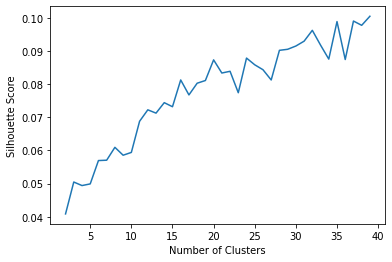

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(range(2, num_clusters), sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
opt_sil_score = max(sil_scores[5:20])
sil_scores.index(opt_sil_score)
opt_num_cluster = range(2, num_clusters)[sil_scores.index(opt_sil_score)]
print('The optimal number of clusters is %s' %opt_num_cluster)

The optimal number of clusters is 20


In [ ]:
km = KMeans(n_clusters=opt_num_cluster)
km.fit(X)
doc_clusters = km.labels_.tolist()

df['cluster_mean'] = doc_clusters
df[df['cluster_mean']==1]['text']

142466    Opinion\nMAURO, J.\nPicerne Construction Corp....
142468    Opinion\nPRAGER, J.\nViorel Bucur (Bucur) and ...
142480    Opinion\nMcDONALD, J.\nMore than 35 years ago,...
142492    Opinion\nHOCH, J.\n— In this unlawful detainer...
142622    Opinion\nHALLER, J.\n— Guadalupe A. Ontiveros,...
                                ...                        
153760    Opinion\nSTREETER, J.\nJason Everett Thompson ...
154013    Opinion\nGILBERT, P. J.\nHow does a landowner ...
154198    Opinion\nCOLLINS, J.—\nINTRODUCTION\nPlaintiff...
154289    Opinion\nCHANEY, J.\nIn 2007, Heart Tronics, I...
154373    Opinion\nMURRAY, J.\nPlaintiff and appellant P...
Name: text, Length: 146, dtype: object

### **K-Medoids**

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 14.7 MB/s 


In [ ]:
from sklearn_extra.cluster import KMedoids

kmed = KMedoids(n_clusters=opt_num_cluster)
kmed.fit(X)
doc_clusters = kmed.labels_.tolist()

df['cluster_med'] = doc_clusters
df[df['cluster_med']==1]['text']

142972    LIU, J.,\nConcurring.—I agree with today’s opi...
143281    KRUGER, J.,\nDissenting.—I agree with the majo...
145158    Opinion\nGILBERT, P. J.\n— In Estate of Kevin ...
145822    Opinion\nJOHNSON, J.\n— On Sunday, May 10, 200...
145824    Opinion\nKRIEGLER, J.\n— Defendant Elizabeth L...
146002    Opinion\nPERLUSS, P. J.\nThe law firm of Phill...
146003    BLUMENFELD, J.,\nDissenting.—After strenuously...
146032    Opinion\nROTHSCHILD, P. J.\nIn this case, we c...
146073    Opinion\nO’LEARY, P. J.-\nAlex Navarro appeals...
147793    Opinion\nMOORE, J.—\nThe amended information i...
147796    Opinion\nTURNER, P. J.—\nI. INTRODUCTION\nDefe...
148906    Opinion\nFYBEL, J.\nINTRODUCTION\nIn 2009, the...
148945    Opinion\nLIU, J.\nIn 1981, Michael Ray Burgene...
148952    Opinion\nKRIEGLER, J.—\nIn 1999, defendant Mic...
149363    Opinion\nKRIEGLER, J.\nIn 1999, defendant Mich...
149409    Opinion\nKANE, J.—\nINTRODUCTION\nOn the day s...
149548    Opinion\nRAMIREZ, P. J.—\nDefe

### **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.95, min_samples=5)
dbscan.fit(X)
db_clusters = dbscan.labels_

df['cluster_db'] = db_clusters
df[df['cluster_db']==1]['text']

142467    Opinion\nCHAVEZ, J.\nThe issue presented in th...
142620    Opinion\nCHANEY, J.\nTwo insurers, Care West P...
142636    Opinion\nCOLLINS, J. —\nPhysician Robin Chorn,...
142744    Opinion\nFRANSON, Acting P. J.\nThis appeal in...
145732    Opinion\nSTEWART, J.\nINTRODUCTION\nAt issue i...
151756    Opinion\nSMITH, J.\nThis case involves the app...
151804    Opinion\nSTEWART,\n2011, Marlene Garnes’s fami...
152120    Opinion\nPREMO, J.\nAdvent, Inc. (Advent), was...
152134    Opinion\nSTEWART, J.—\nINTRODUCTION\nAt issue ...
152239    Opinion\nCHAVEZ, Acting P. J.\n—A workers’ com...
152264    Opinion\nMcKINSTER, P. J.\nPetitioner, County ...
153016    Opinion\nGRIMES, J.\n—Petitioner Truck Insuran...
154357    Opinion\nNICHOLSON, Acting P.J.—\nDefendant in...
154387    Opinion\nMcGUINESS, P. J.\n—Plaintiff William ...
154391    Opinion\nHULL, J. —\nTwo insurers shared indem...
154403    Opinion\nMcGUINESS, P. J.\nPlaintiff William B...
Name: text, dtype: object

### **Hierarchical DBSCAN**
Automatically chooses epsilon, performing DBSCAN over various epsilon values e returns the result that gives the best stability over epsilon. For reference see [here](https://github.com/scikit-learn-contrib/hdbscan/).

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 13.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340257 sha256=6f8a387e4b6742373a0d3d685bfff71a1272f604cbcbc43c9b22599ab1212a38
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
from hdbscan import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size=5)
hdbscan.fit(X)
hdb_clusters = hdbscan.labels_

df['cluster_hdb'] = hdb_clusters
df[df['cluster_hdb']==1]['text']

149072    Opinion\nRUVOLO, P. J.—\nI.\nINTRODUCTION\nApp...
149073    STREETER, J.,\nConcurring.—I concur fully in t...
151089    Opinion\nGILBERT, P. J.\nCalifornia’s so-calle...
151746    Opinion\nNARES, J.\nLuis M. Ovalle Fregoso app...
153039    Opinion\nRUVOLO, P. J.—\nI.\nINTRODUCTION\nApp...
153040    STREETER, J.,\nConcurring.—I concur fully in t...
153083    Opinion\nARONSON, J.—\nFamily Code section 304...
Name: text, dtype: object

### **Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=opt_num_cluster, affinity='euclidean', linkage='ward')
cluster.fit_predict(X.toarray())

clusters = dbscan.labels_

df['cluster_hie'] = clusters
df[df['cluster_hie']==1]['text']

142467    Opinion\nCHAVEZ, J.\nThe issue presented in th...
142620    Opinion\nCHANEY, J.\nTwo insurers, Care West P...
142636    Opinion\nCOLLINS, J. —\nPhysician Robin Chorn,...
142744    Opinion\nFRANSON, Acting P. J.\nThis appeal in...
145732    Opinion\nSTEWART, J.\nINTRODUCTION\nAt issue i...
151756    Opinion\nSMITH, J.\nThis case involves the app...
151804    Opinion\nSTEWART,\n2011, Marlene Garnes’s fami...
152120    Opinion\nPREMO, J.\nAdvent, Inc. (Advent), was...
152134    Opinion\nSTEWART, J.—\nINTRODUCTION\nAt issue ...
152239    Opinion\nCHAVEZ, Acting P. J.\n—A workers’ com...
152264    Opinion\nMcKINSTER, P. J.\nPetitioner, County ...
153016    Opinion\nGRIMES, J.\n—Petitioner Truck Insuran...
154357    Opinion\nNICHOLSON, Acting P.J.—\nDefendant in...
154387    Opinion\nMcGUINESS, P. J.\n—Plaintiff William ...
154391    Opinion\nHULL, J. —\nTwo insurers shared indem...
154403    Opinion\nMcGUINESS, P. J.\nPlaintiff William B...
Name: text, dtype: object

## Part 3 - LDA

Latent Dirilect Allocation, or LDA, is an approach to model the distribution of topics that appear in a body of text.

In [ ]:
# vizualize the document term matrix from Part 2
X_matrix = pd.DataFrame(X_dense)
X_matrix

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.000000,0.001855,0.000000,0.0,0.014346,0.001940,0.001902,0.001866,...,0.000000,0.000000,0.008348,0.000000,0.000000,0.138165,0.0,0.008630,0.000000,0.003298
1,0.011175,0.003537,0.000000,0.000000,0.000000,0.0,0.015427,0.008344,0.008182,0.004013,...,0.000000,0.000000,0.008977,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.014185
2,0.000000,0.009370,0.029416,0.000000,0.018924,0.0,0.010219,0.011054,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.010662,0.009396
3,0.000000,0.017673,0.009247,0.006646,0.000000,0.0,0.000000,0.159838,0.177181,0.000000,...,0.021054,0.000000,0.014953,0.093918,0.320247,0.009900,0.0,0.000000,0.000000,0.000000
4,0.000000,0.016059,0.000000,0.049821,0.000000,0.0,0.000000,0.004736,0.004644,0.027330,...,0.000000,0.007409,0.005095,0.442218,0.000000,0.000000,0.0,0.000000,0.000000,0.004026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0.000000,0.044324,0.000000,0.033335,0.000000,0.0,0.016112,0.008714,0.000000,0.000000,...,0.013201,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.059258
1544,0.000000,0.046149,0.000000,0.000000,0.000000,0.0,0.012582,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.014642,0.016721,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1545,0.007237,0.009162,0.014381,0.000000,0.000000,0.0,0.004996,0.005404,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006639,0.000000,0.000000,0.0,0.006011,0.000000,0.000000
1546,0.000000,0.007933,0.000000,0.000000,0.000000,0.0,0.002884,0.003119,0.000000,0.000000,...,0.000000,0.000000,0.006712,0.015329,0.000000,0.000000,0.0,0.006939,0.012034,0.002651


In [ ]:
# FILL IN THE ELLIPSES
from sklearn.decomposition import LatentDirichletAllocation

# n_topics represents the number of topics you're training the LDA model to fit to
n_topics = 40

lda = LatentDirichletAllocation(n_components = n_topics, # how many topics we want 
                                max_iter = 20, # maximum learning iterations 
                                learning_method = 'online',
                                learning_offset = 80., 
                                total_samples = len(X_matrix),
                                random_state = 0)
lda.fit(X_matrix)

LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=40, random_state=0,
                          total_samples=1548)

In [ ]:
#This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("\nTopics in LDA model:")
feature_names = vectorizer.get_feature_names()

# take a look at the print_top_words function above to get an understanding of what each paramter menas
print_top_words(lda, feature_names, 15) 


Topics in LDA model:

Topic #0:
investigation officers commercial gang notice plaintiff site criminal council action safety discovery officer prosecutor terms

Topic #1:
limitations privilege jury action board page post complaint plaintiff government year cause aware questions relationship

Topic #2:
class room notice guilt settlement new just hospital jones 50 recognized corporation burglary false raised

Topic #3:
order request remedy entered ballot income benefit plaintiffs california court concluded writ 31 initial potential express

Topic #4:
arbitration indian juvenile court jurisdiction custody parole agreement juvenile appellant alleged breach 61 probation sentence declaration

Topic #5:
city defendant judge johnson plan marijuana judgment agency attorney order health fee public district attorney police

Topic #6:
defendant jury dr evidence penalty appellants john murder testimony verdict defense jane circumstance special state

Topic #7:
defendant firearm count conviction peo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install pyldavis

# pyLDAvis is a package which allows you to view topic distribution of your text
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

lda_display = pyLDAvis.sklearn.prepare(lda, 
                                       X, 
                                       vectorizer)

pyLDAvis.save_html(lda_display, 'lda_visualization.html')
# See lda_visualization.html to explore the LDA based topics

lda_display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 28.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f24dc6bb9c98611d6856770e08492cd4537e063de0404f3a35a9046a43a0daf9
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-on

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.035658  0.071336       1        1  52.816464
20    -0.014272 -0.100507       2        1  35.787219
22     0.426905  0.003218       3        1   2.088801
37    -0.010228  0.000807       4        1   0.251554
28    -0.010172  0.000012       5        1   0.251554
23    -0.010251  0.000871       6        1   0.251554
38    -0.010111  0.000779       7        1   0.251554
24    -0.010132  0.000512       8        1   0.251554
25    -0.010247  0.000737       9        1   0.251554
26    -0.010113  0.000825      10        1   0.251554
27    -0.010263  0.000657      11        1   0.251554
29    -0.010177  0.000921      12        1   0.251554
36    -0.010147  0.000746      13        1   0.251554
21    -0.010266  0.000658      14        1   0.251554
31    -0.010283  0.000021      15        1   0.251554
32    -0.010320  0.000800      16        1   0.251554
33    -0.010065  0.000689      17        1   0.251554
34    -0.010222  0.000659      18        1   0.251554
35    -0.010206  0.000867      19        1   0.251554
30    -0.010206  0.000800      20        1   0.251554
0     -0.010319  0.000782      21        1   0.251554
1     -0.010305  0.000822      22        1   0.251554
9     -0.010103  0.000591      23        1   0.251554
2     -0.010252  0.000817      24        1   0.251554
3     -0.010217  0.000812      25        1   0.251554
4     -0.009961  0.000802      26        1   0.251554
5     -0.010120  0.000822      27        1   0.251554
6     -0.010207  0.000558      28        1   0.251554
7     -0.009998  0.000417      29        1   0.251554
8     -0.010193  0.000546      30        1   0.251554
10    -0.010258  0.000735      31        1   0.251554
19    -0.010163  0.000664      32        1   0.251554
11    -0.010241  0.000678      33        1   0.251554
12    -0.010283  0.000792      34        1   0.251554
13    -0.010202  0.000789      35        1   0.251554
14    -0.010093  0.000740      36        1   0.251554
15    -0.009960  0.000796      37        1   0.251554
16    -0.010306  0.000691      38        1   0.251554
18    -0.010286  0.000878      39        1   0.251554
39    -0.010097  0.000858      40        1   0.251554, topic_info=          Term        Freq       Total Category  logprob  loglift
322  defendant  131.000000  131.000000  Default  30.0000  30.0000
212      child   35.000000   35.000000  Default  29.0000  29.0000
626     mother   33.000000   33.000000  Default  28.0000  28.0000
690     people   64.000000   64.000000  Default  27.0000  27.0000
706  plaintiff   53.000000   53.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
933       term    0.035036   24.710699  Topic40  -6.8961  -0.5733
983      water    0.035021   14.969331  Topic40  -6.8966  -0.0725
68         act    0.035020   37.233486  Topic40  -6.8966  -0.9838
317   decision    0.035013   22.245784  Topic40  -6.8968  -0.4689
868        set    0.035000   15.969709  Topic40  -6.8971  -0.1378

[3162 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         1  0.567434      100
2         2  0.283717      100
3         1  0.510849       11
3         2  0.340566       11
4         2  0.948289     1170
...     ...       ...      ...
997       2  0.164317  written
998       1  0.478556     year
998       2  0.478556     year
999       1  0.306198    years
999       2  0.656139    years

[1463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 21, 23, 38, 29, 24, 39, 25, 26, 27, 28, 30, 37, 22, 32, 33, 34, 35, 36, 31, 1, 2, 10, 3, 4, 5, 6, 7, 8, 9, 11, 20, 12, 13, 14, 15, 16, 17, 19, 40])

## Part 4 - NMF, PCA, SVD - matrix decomposition methods

### **Non-negative Matrix Factorization (NMF)**

Helper method - `show_topics`




In [ ]:
num_top_words=8
vocab = np.array(vectorizer.get_feature_names())
import numpy as np
import matplotlib.pyplot as plt
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn import decomposition

clf = decomposition.NMF(n_components=10, random_state=1)

W1 = clf.fit_transform(X)
H1 = clf.components_

show_topics(H1)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


['defendant jury evidence people murder defense victim prosecutor',
 'plaintiff action plaintiffs complaint defendants cause action slapp claim',
 'proposition 47 1170 1170 18 section 1170 proposition conviction sentence felony',
 'mother child father juvenile court juvenile parent children parents',
 'city project agency ceqa eir ordinance public environmental',
 'arbitration agreement contract employee employment claims employer provision',
 'appellant people evidence jury burglary testimony counsel mental',
 'probation condition juvenile minor search officer juvenile court gang',
 'fees attorney attorney fees motion award order judge party',
 'trust trustee property sale loan bank assignment void']

### **SVD - singular value decomposition**

In [ ]:
U, s, Vh = np.linalg.svd(X_matrix, full_matrices=False)
print(U.shape, s.shape, Vh.shape)

(1548, 1000) (1000,) (1000, 1000)


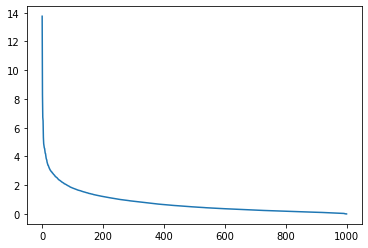

In [ ]:
plt.plot(s)

In [ ]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

show_topics(Vh[:10])

['jane addressed cited eir approval agencies resources despite',
 'defendant people 1170 conviction proposition 47 sentence offense felony',
 'proposition 47 1170 1170 18 section 1170 proposition section 1170 18 47 misdemeanor',
 'mother juvenile child father juvenile court minor parent children',
 'arbitration plaintiff agreement fees attorney fees mother action defendant',
 'arbitration agreement employee project employment city employer contract',
 'appellant gang people probation officer burglary arbitration jury',
 'mother jury father evidence plaintiff child proposition 47 plaintiffs',
 'fees attorney fees project attorney appellant trust award arbitration',
 'fees dr appellant attorney board attorney fees medical judge']

### **PCA - Principle Component Analysis**

In [ ]:
#%% Principal Components
from sklearn.decomposition import PCA
pca = PCA(n_components=3,svd_solver='randomized')
Xpca = pca.fit_transform(X_matrix)
pca.explained_variance_ratio_

array([0.05242049, 0.03344236, 0.03122713])

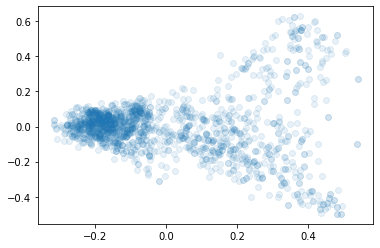

In [ ]:
#%% PCA Viz
plt.scatter(Xpca[:,0],Xpca[:,1], alpha=.1)
plt.show()

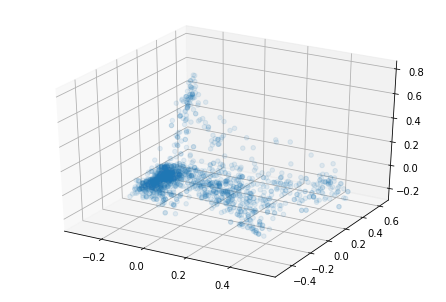

In [ ]:
#%% PCA 3D Viz
from mpl_toolkits.mplot3d import Axes3D
Axes3D(plt.figure()).scatter(Xpca[:,0],Xpca[:,1], Xpca[:,2], alpha=.1)
plt.show()

In [ ]:
#%% make components to explain 95% of variance
pca = PCA(n_components=.95)
X95 = pca.fit_transform(X_matrix)
pca.n_components_

397

ValueError: ignored

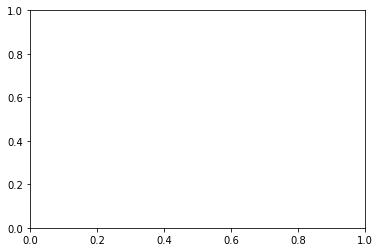

In [ ]:
#%% PCA Inverse Transform
Xrestore = pca.inverse_transform(X95)
plt.plot(Xrestore[0, :].shape, X[0, :],'ro')
# Xrestore[0, :].shape, X[0, :].T.shape

In [ ]:
#%% Incremental PCA
X_mm = X

from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=100, batch_size=1000)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=1000, n_components=100)

In [ ]:
#%% PC Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
Y = df['log_cite_count']
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg,
                         X95[:,:10],
                         Y) 
scores.mean()

KeyError: ignored

In [ ]:
#%% MDS, Isomap, and T-SNE
from sklearn.manifold import MDS, Isomap, TSNE
mds = MDS(n_components=2)
Xmds = mds.fit_transform(X[:500,:200])
Axes3D(plt.figure()).scatter(Xmds[:,0],Xmds[:,1], alpha=.3)

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


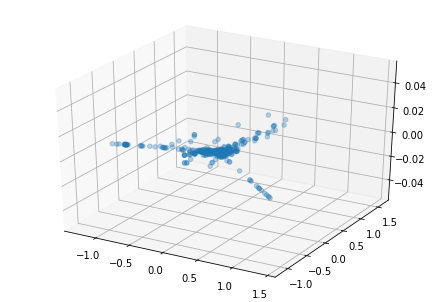

In [ ]:
#%% Isomap
iso = Isomap(n_components=2)
Xiso = iso.fit_transform(X[:500,:200])
Axes3D(plt.figure()).scatter(Xiso[:,0],Xiso[:,1], alpha=.3)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


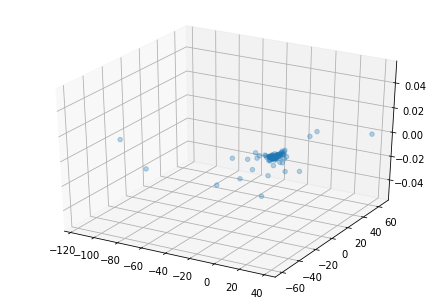

In [ ]:
#%% t-SNE
tsne = TSNE(n_components=2, n_iter=250)
Xtsne = tsne.fit_transform(X[:500,:200])
Axes3D(plt.figure()).scatter(Xtsne[:,0],Xtsne[:,1], alpha=.3)